# YouTube Shorts Performance Dataset EDA

### Sources
This dataset is synthetically generated to replicate real-world YouTube Shorts performance patterns. No personal, copyrighted, or platform-restricted data was scraped or collected. All values—such as views, likes, shares, and comments—are created using realistic ranges based on publicly observable trends on YouTube Shorts.

### Collection Methodology
Publicly available insights about YouTube Shorts engagement behavior General performance trends shared by creators and industry reports No external APIs or official YouTube data were used No individual user data or real channel information is included This ensures compliance with YouTube policies while still providing a dataset useful for analysis and modeling.

### About Dataset
This dataset contains medium-sized performance insights of YouTube Shorts, covering 300 videos across multiple categories such as Tech, Travel, Food, Comedy, Lifestyle, and Education.
It includes detailed metrics like:

- Duration (seconds)

- Hashtag count

- Views, Likes, Comments, Shares

- Upload hour

- Category

## Import

In [199]:
import os
import pandas as pd
import kagglehub
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

In [129]:
path = kagglehub.dataset_download("prince7489/youtube-shorts-performance-dataset")
data_name = os.listdir(path)[0]
dataset = pd.read_csv(f"{path}/{data_name}")
dataset.head()

Using Colab cache for faster access to the 'youtube-shorts-performance-dataset' dataset.


video_id           title  duration_sec  hashtags_count   views  likes  \
0  vid_1000  Short Video #0            43               9  198775  21933   
1  vid_1001  Short Video #1            56               2  290336  20063   
2  vid_1002  Short Video #2            33               6  264206  37032   
3  vid_1003  Short Video #3            19               9   85076  27269   
4  vid_1004  Short Video #4            47               8   90780   8041   

   comments  shares  upload_hour   category  
0      3228     400            8       Tech  
1      3719    1942           16     Comedy  
2      3228    1817            7       Food  
3      2371     980            1  Lifestyle  
4      2891    1109           23       Tech

In [130]:
#check missing values
print(dataset.isna().sum())
if 'title' in dataset:
    dataset = dataset.drop('title', axis = 1)
dataset.head()

#let's see all the unique value of category values
print(dataset['category'].value_counts())

video_id          0
title             0
duration_sec      0
hashtags_count    0
views             0
likes             0
comments          0
shares            0
upload_hour       0
category          0
dtype: int64
category
Food         57
Tech         55
Comedy       53
Education    53
Lifestyle    42
Travel       40
Name: count, dtype: int64


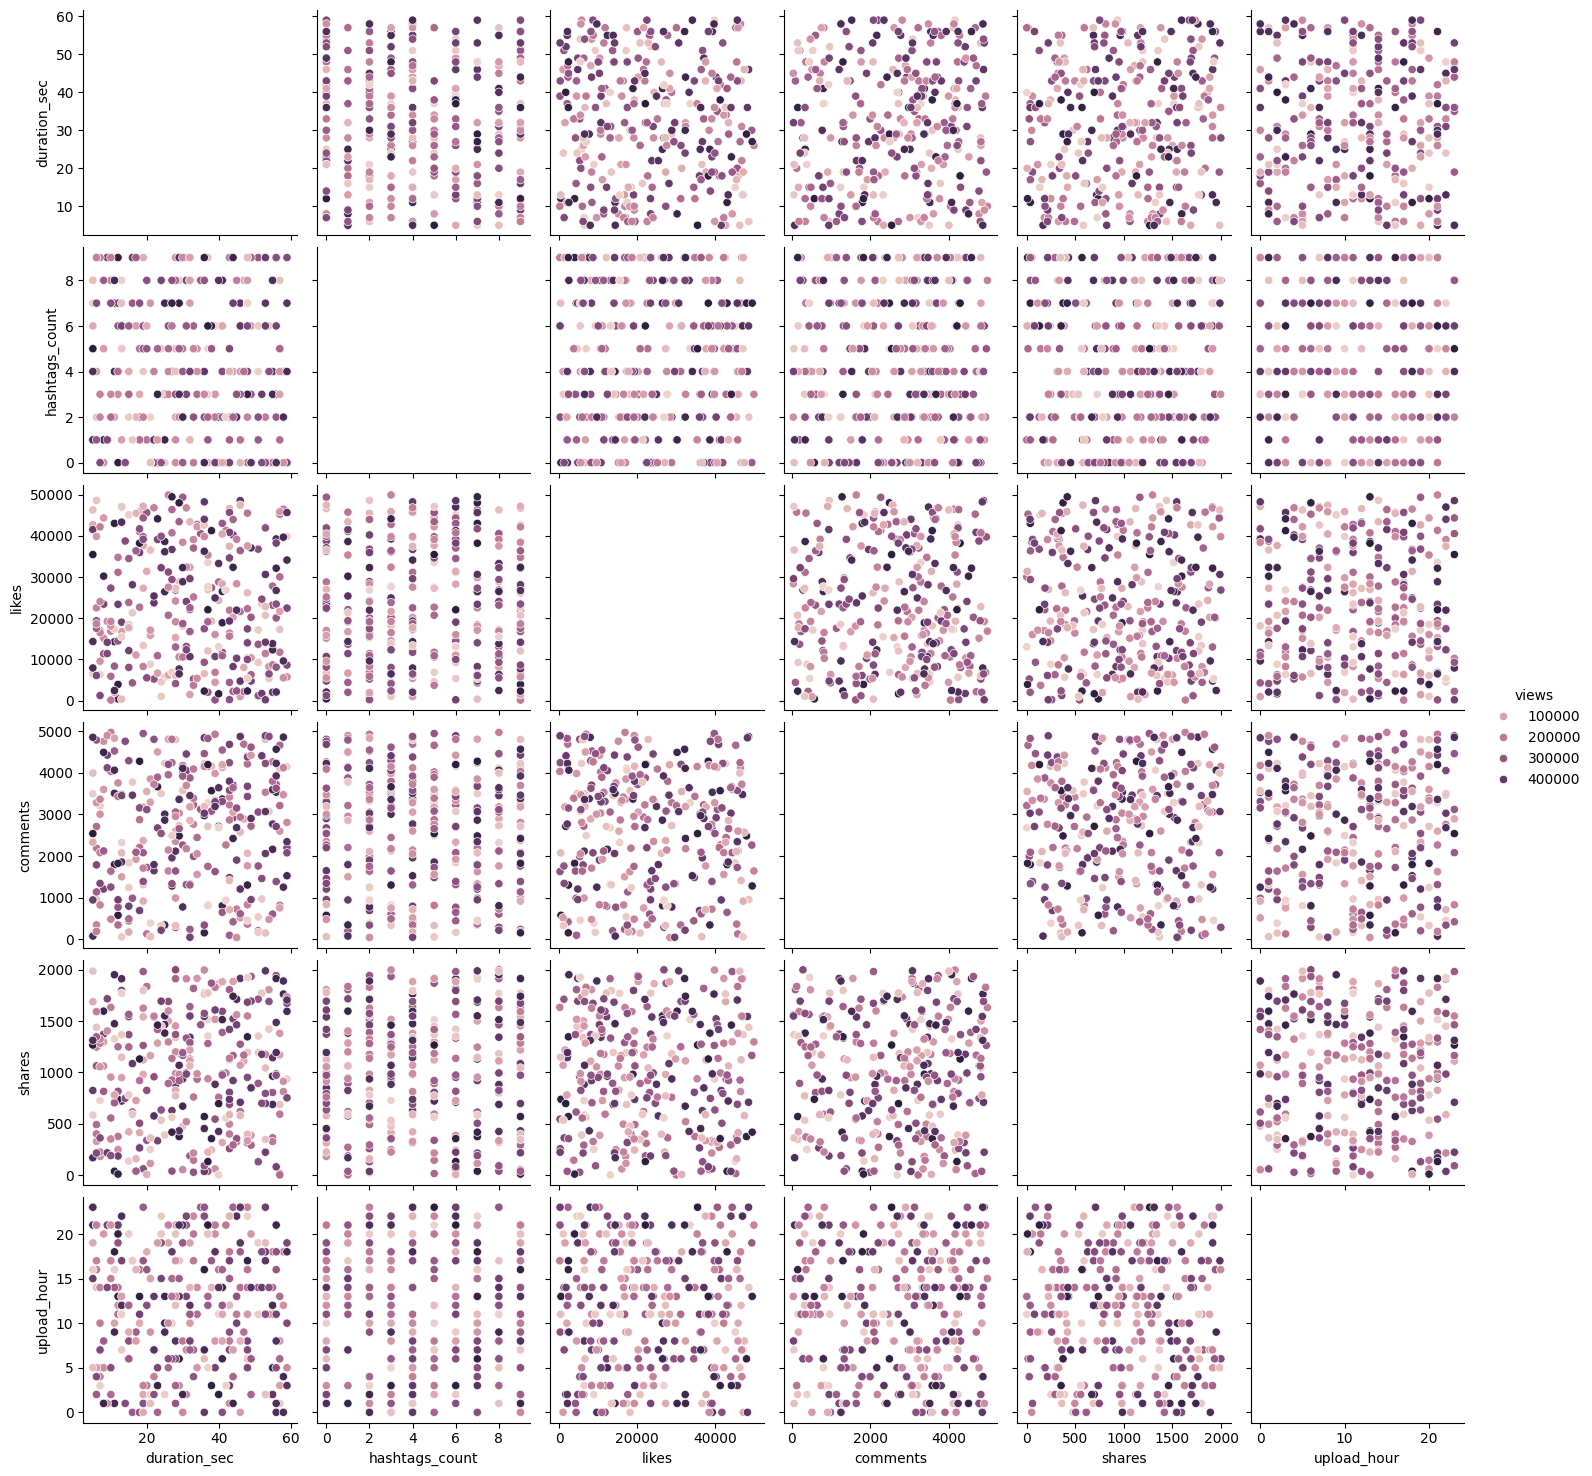

In [131]:
#let's see the dataset pairplot (no check needed for non-type int or float variables with seaborn)
sns.pairplot(dataset, hue = 'views')
plt.show()

In [132]:
def check_skewness(dataset):
    print('skewness for the whole dataset:')
    for key in dataset:
        print(f"{key} = {dataset[key].skew()}")
    return None

dataset_numeric = dataset.select_dtypes(include = ['int','float'])
dataset_cat = dataset.select_dtypes(include = 'object')

check_skewness(dataset_numeric)
#so there isn't a strong skewness with our data

skewness for the whole dataset:
duration_sec = -0.02477868941066114
hashtags_count = 0.10354702558144038
views = -0.04288615951613806
likes = 0.1803436036399703
comments = -0.21356509150472916
shares = -0.04855686067286318
upload_hour = -0.05597523817444224


                duration_sec  hashtags_count     views     likes  comments  \
duration_sec        1.000000       -0.035128  0.074487 -0.052211  0.078740   
hashtags_count     -0.035128        1.000000  0.010908  0.011884 -0.042305   
views               0.074487        0.010908  1.000000  0.035115  0.069525   
likes              -0.052211        0.011884  0.035115  1.000000 -0.034672   
comments            0.078740       -0.042305  0.069525 -0.034672  1.000000   
shares              0.071623        0.078601  0.015937 -0.037390 -0.001715   
upload_hour         0.002692        0.034368  0.018833 -0.014855  0.016920   

                  shares  upload_hour  
duration_sec    0.071623     0.002692  
hashtags_count  0.078601     0.034368  
views           0.015937     0.018833  
likes          -0.037390    -0.014855  
comments       -0.001715     0.016920  
shares          1.000000    -0.027530  
upload_hour    -0.027530     1.000000  


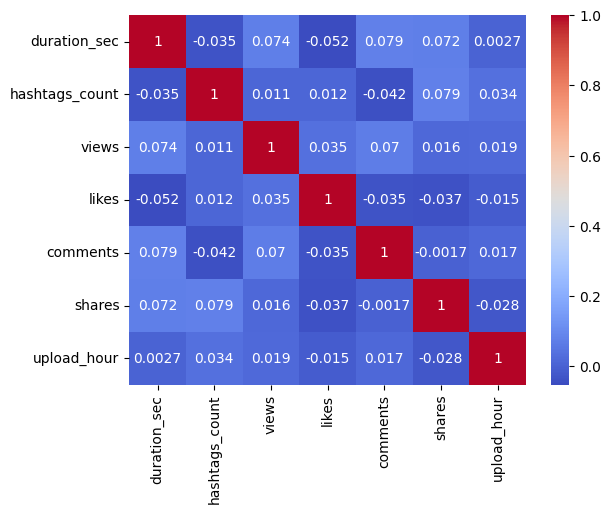

In [133]:
corr_matrix = dataset_numeric.corr()
print(corr_matrix)
sns.heatmap(corr_matrix, cmap = 'coolwarm', annot = True)
plt.show()

In [134]:
#including the video's topic could be usefull
def get_encoding(encoded_column, column):
    diz = {}
    for i in video_topic_encoded:
        if video_topic[i] not in diz:
            diz[column[i]] = [int(encoded_column[i])]
    return diz

video_topic = dataset['category']
label_enc = LabelEncoder()
video_topic_encoded = label_enc.fit_transform(video_topic)

print('encoded values, check after the eda:')
print(get_encoding(video_topic_encoded, video_topic))
video_topic_encoded = [int(x) for x in video_topic_encoded]
video_topic_df = pd.DataFrame(
    {'encoded_topic': video_topic_encoded},
    index=dataset.index
)

df_numeric = pd.concat([dataset_numeric, video_topic_df], axis=1)
df_numeric.head()

encoded values, check after the eda:
{'Tech': [4], 'Food': [2], 'Lifestyle': [3], 'Travel': [5], 'Comedy': [0]}


duration_sec  hashtags_count   views  likes  comments  shares  upload_hour  \
0            43               9  198775  21933      3228     400            8   
1            56               2  290336  20063      3719    1942           16   
2            33               6  264206  37032      3228    1817            7   
3            19               9   85076  27269      2371     980            1   
4            47               8   90780   8041      2891    1109           23   

   encoded_topic  
0              4  
1              0  
2              2  
3              3  
4              4

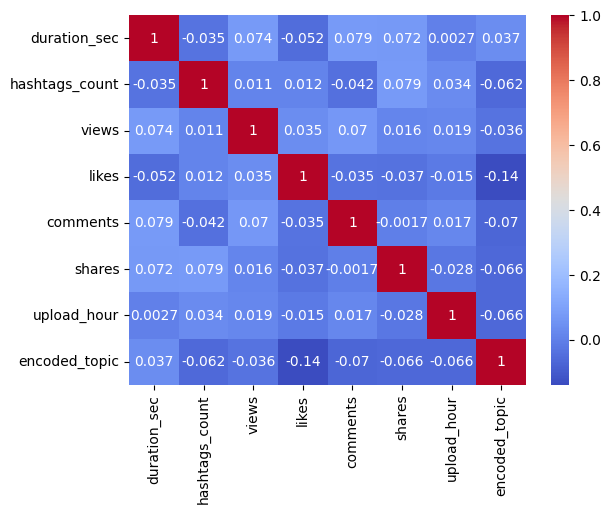

In [135]:
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, cmap = 'coolwarm', annot = True)
plt.show()

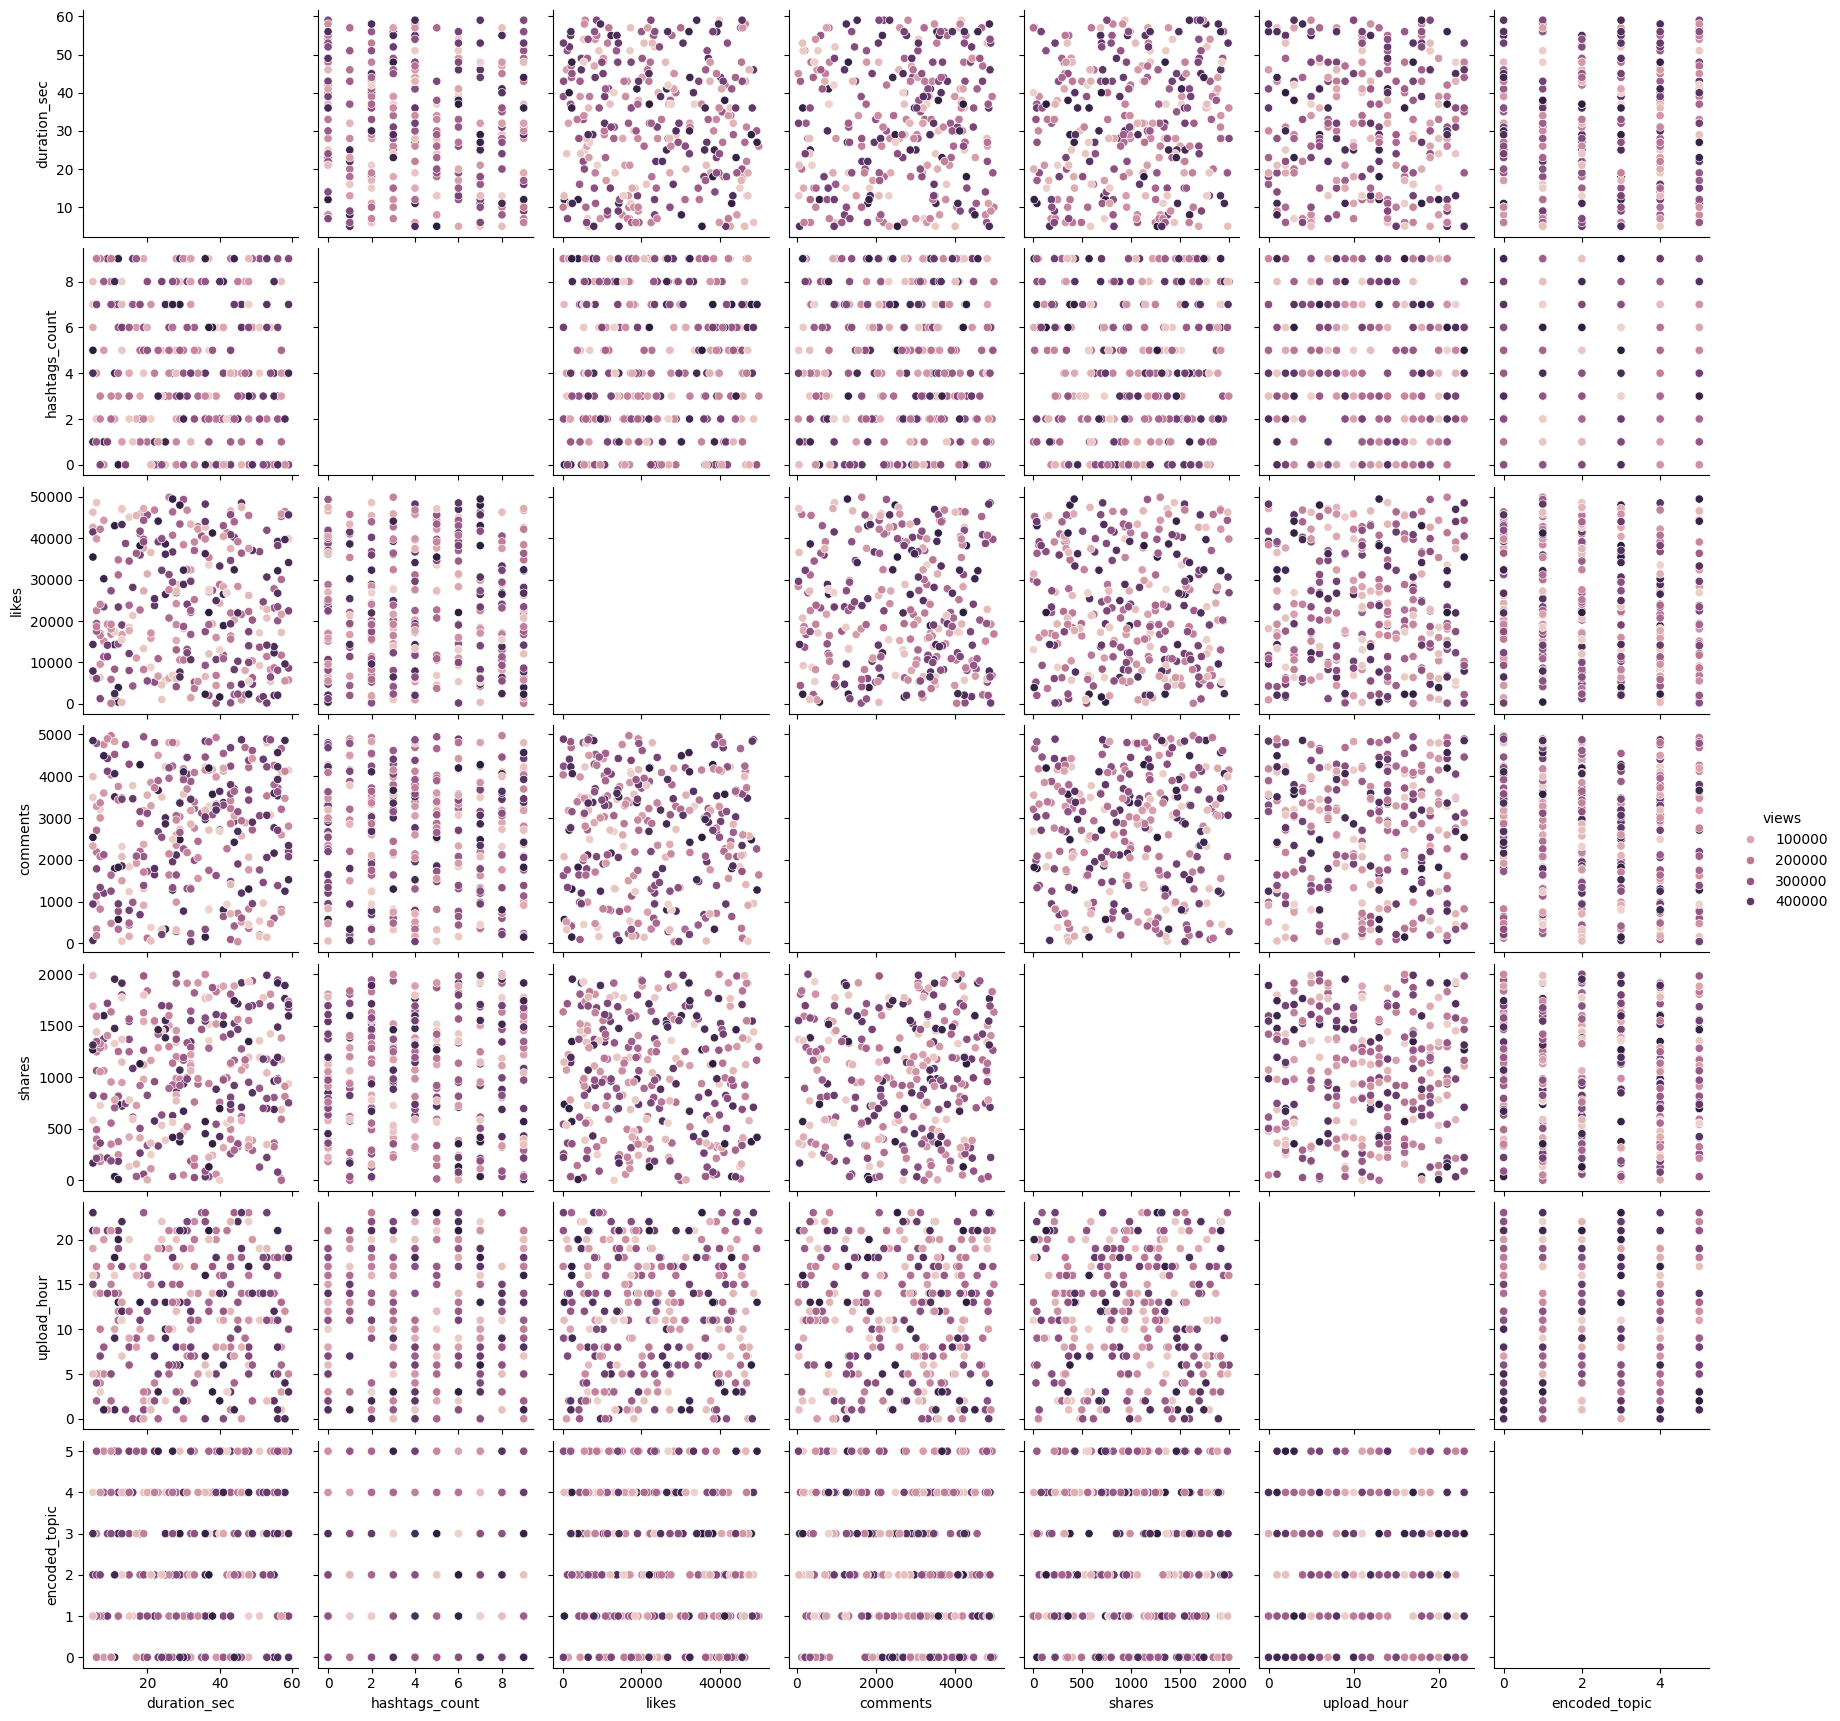

In [136]:
sns.pairplot(df_numeric, hue = 'views')
plt.show()

In [137]:
#let's check the skewness
print(check_skewness(df_numeric))

skewness for the whole dataset:
duration_sec = -0.02477868941066114
hashtags_count = 0.10354702558144038
views = -0.04288615951613806
likes = 0.1803436036399703
comments = -0.21356509150472916
shares = -0.04855686067286318
upload_hour = -0.05597523817444224
encoded_topic = 0.08140652626626615
None


In [138]:
ohe = OneHotEncoder(sparse_output = False)
encoded_dataset = ohe.fit_transform(dataset_cat)
print(encoded_dataset.shape)
encoded_dataset = pd.DataFrame(data = encoded_dataset)
eda_dataset = pd.concat([dataset_numeric, encoded_dataset], axis = 1)
eda_dataset.head()

(300, 306)


duration_sec  hashtags_count   views  likes  comments  shares  upload_hour  \
0            43               9  198775  21933      3228     400            8   
1            56               2  290336  20063      3719    1942           16   
2            33               6  264206  37032      3228    1817            7   
3            19               9   85076  27269      2371     980            1   
4            47               8   90780   8041      2891    1109           23   

     0    1    2  ...  296  297  298  299  300  301  302  303  304  305  
0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
1  0.0  1.0  0.0  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  1.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
4  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  

[5 rows x 313 columns]

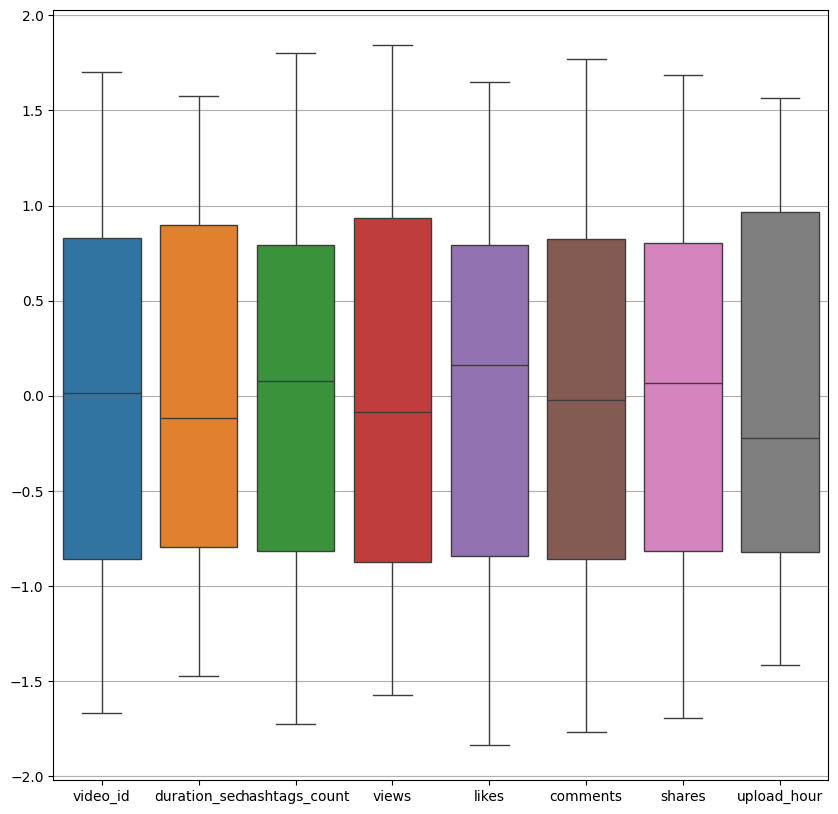

<Figure size 640x480 with 0 Axes>

In [164]:
plt.figure(figsize = (10,10))
plt.grid()
sns.boxplot(df_numeric)
plt.show()
plt.tight_layout()

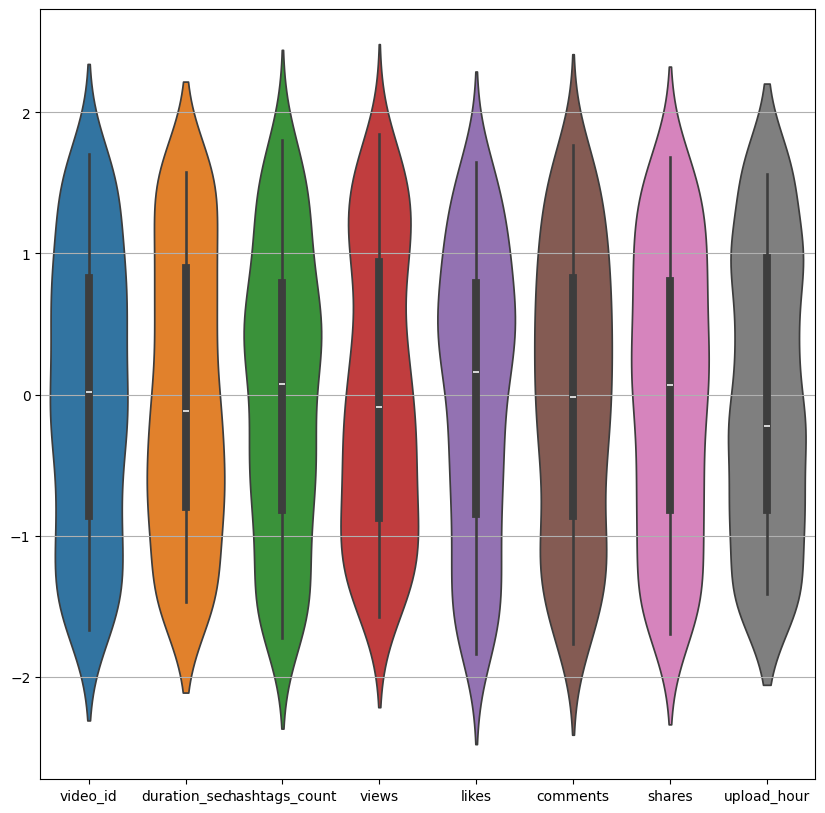

<Figure size 640x480 with 0 Axes>

In [ ]:
scaler = StandardScaler()
column_names = ['video_id', 'duration_sec','hashtags_count','views',
               'likes','comments','shares','upload_hour']

df_numeric = pd.DataFrame(data = scaler.fit_transform(df_numeric), columns= column_names)
plt.figure(figsize = (10,10))
plt.grid()
sns.violinplot(df_numeric)
plt.show()
plt.tight_layout()

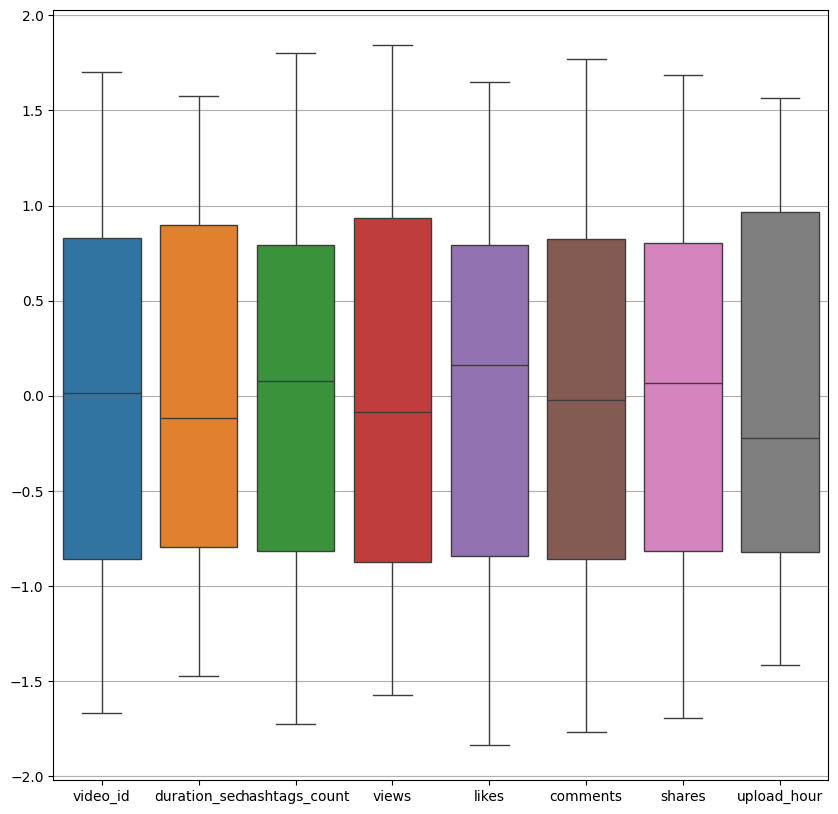

<Figure size 640x480 with 0 Axes>

In [161]:
plt.figure(figsize = (10,10))
plt.grid()
sns.boxplot(df_numeric)
plt.show()
plt.tight_layout()

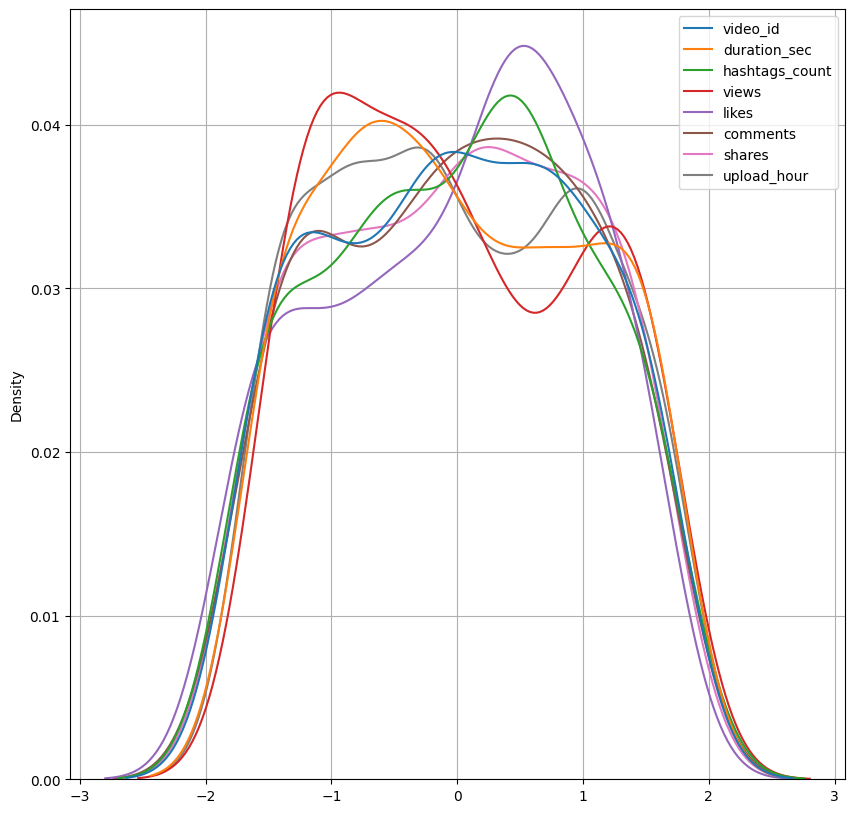

<Figure size 640x480 with 0 Axes>

In [162]:
plt.figure(figsize = (10,10))
plt.grid()
sns.kdeplot(df_numeric)
plt.show()
plt.tight_layout()

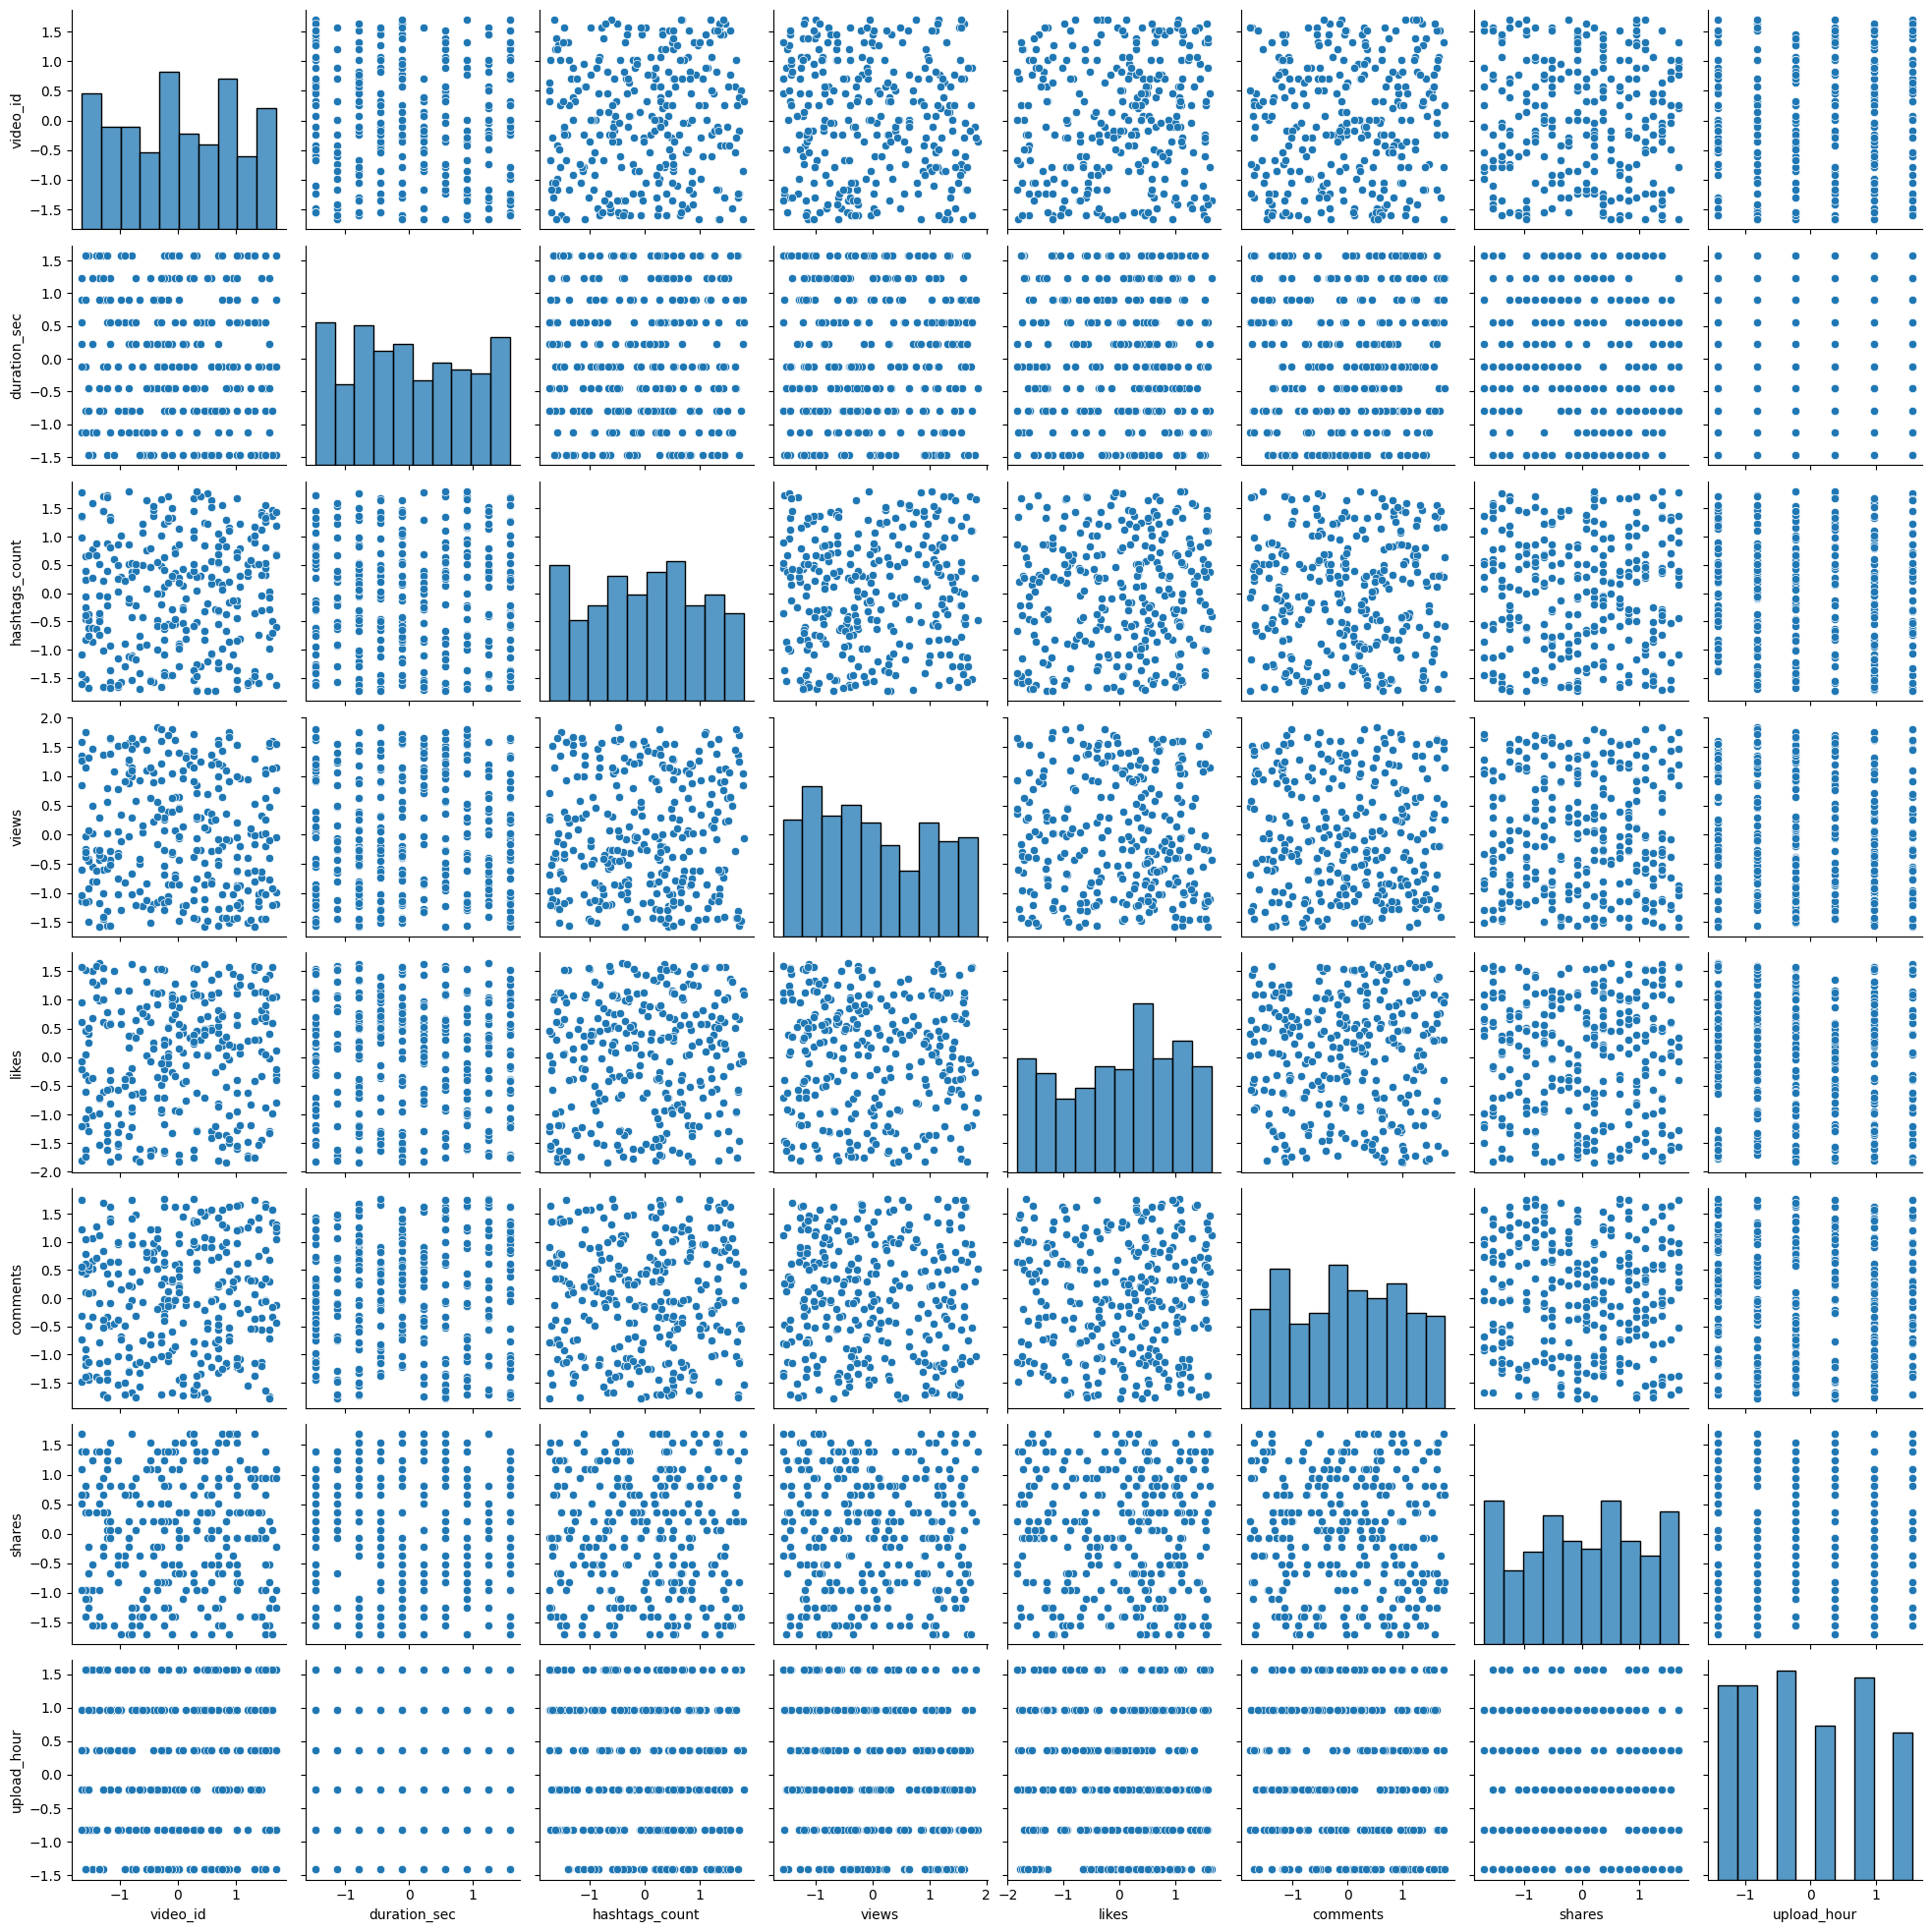

In [163]:
sns.pairplot(df_numeric)
plt.show()

## Considerations

It is clearly evident that the features have limited predictive power in linear terms. Even though they are well balanced, the features do not provide meaningful predictive value when considered individually. However, they may interact in a multifactorial way — and this is likely the case. We therefore try one last approach before moving on to evaluate a feature set that is potentially more predictive.

In [213]:
def make_score(y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    return f"r2_score = {r2},\n mean_squared_error = {mse}"
lr = LinearRegression()
target = eda_dataset['views']
X = eda_dataset.drop('views', axis = 1)
X.columns = X.columns.astype(str)
X_train, X_test, y_train, y_test = train_test_split(X, target, random_state = 42, test_size = 0.2)
eda_dataset.head()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr_score = make_score(y_test, y_pred)

In [214]:
coef = pd.DataFrame(
    lr.coef_, columns = ['Coefficients'], index = X_train.columns
)
coeff = coef[:5]
coeff.head()

Coefficients
duration_sec       78.554954
hashtags_count  -1102.982505
likes               0.144050
comments            5.989877
shares             -0.953790

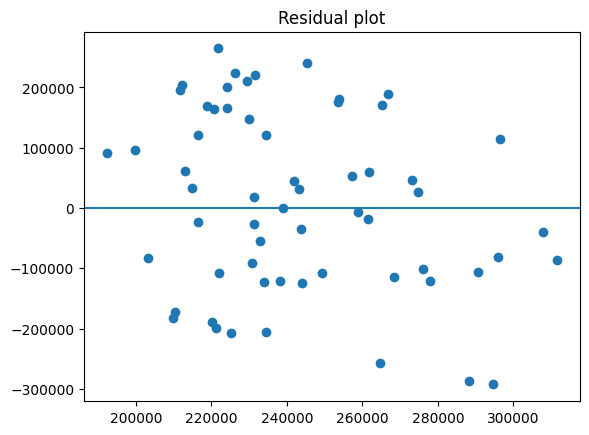

In [215]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0)
plt.title("Residual plot")
plt.show()

In [205]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_score = make_score(y_test, y_pred)

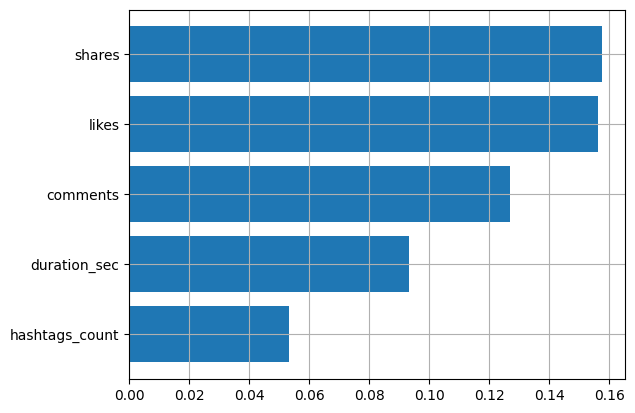

In [206]:
importances = rf.feature_importances_[:5]
indices = np.argsort(importances)
fig, ax = plt.subplots()
plt.grid()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

In [208]:
dummy = DummyRegressor()
dummy.fit(X_train, y_train)
y_pred = dummy.predict(X_test)
dummy_score = make_score(y_test, y_pred)

In [209]:
print(f"linear regression score = {lr_score}")
print(f"random forest score = {rf_score}")
print(f"dummy score = {dummy_score}")

linear regression score = r2_score = -0.06919700911332582,
 mean_squared_error = 21901981606.72548
random forest score = r2_score = -0.04745047729147389,
 mean_squared_error = 21456514460.902412
dummy score = r2_score = -0.0028378222926630503,
 mean_squared_error = 20542645883.93974


As expected, the evaluation metrics are not encouraging, and the feature importance analysis confirms that the features have very limited predictive power.
The best approach is by using a feature extractor, we can easly assume that the correlation between feature in our dataset is non-linear but also not quadratic, this can be assumed by seeing the residual plot of the linear regression.